<a href="https://colab.research.google.com/github/hainesdata/gas/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

raw = pd.read_csv('gas_buddy_2022-04-18.csv')
raw.nunique()

services_included     2932
price_time_stamp     11960
currency                 1
postal_code           8508
loc_name              1292
city                  1010
review_count           469
state                    2
zip_code_searched      547
latitude              9459
product_name             6
payment_type             2
DATE_SCRAPED          1472
RUN_START_DATE           1
source_url            9471
phone                 8605
loc_number            9471
price_current          283
country                  1
longitude             9460
address_1             9446
address_2             5826
overall_rating          40
dtype: int64

In [2]:
raw[:3]

services_included     price_time_stamp  \
0  Regular, Midgrade, Premium, C-Store, Pay At Pu...  2022-04-17 14:49:58   
1  Regular, Midgrade, Premium, C-Store, Pay At Pu...  2022-04-17 14:49:58   
2  Regular, Midgrade, Premium, C-Store, Pay At Pu...  2022-04-17 14:49:58   

  currency postal_code loc_name         city  review_count state  \
0      USD  90001-2731    World  Los Angeles          51.0    CA   
1      USD  90001-2731    World  Los Angeles          51.0    CA   
2      USD  90001-2731    World  Los Angeles          51.0    CA   

   zip_code_searched   latitude  ...            RUN_START_DATE  \
0              90001  33.974931  ...  2022-04-18T05:01:23+8:00   
1              90001  33.974931  ...  2022-04-18T05:01:23+8:00   
2              90001  33.974931  ...  2022-04-18T05:01:23+8:00   

                               source_url         phone loc_number  \
0  https://www.gasbuddy.com/Station/10451  323-582-6158      10451   
1  https://www.gasbuddy.com/Station/10451  323-582-6158      10451   
2  https://www.gasbuddy.com/Station/10451  323-582-6158      10451   

  price_current country   longitude            address_1   address_2  \
0          5.49     USA -118.237916  1935 E Florence Ave  Wilson Ave   
1          5.59     USA -118.237916  1935 E Florence Ave  Wilson Ave   
2          5.69     USA -118.237916  1935 E Florence Ave  Wilson Ave   

   overall_rating  
0             3.8  
1             3.8  
2             3.8  

[3 rows x 23 columns]

In [19]:
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

sandbox = raw.copy()
sandbox = sandbox[sandbox['price_current'] != 0]
sandbox.drop(columns=['postal_code', 'source_url', 'DATE_SCRAPED', 'RUN_START_DATE', 
                      'zip_code_searched', 'country', 'currency', 'overall_rating', 
                      'price_time_stamp', 'loc_number', 'phone', 'state', 'address_1', 
                       'address_2'],
             inplace=True)
sandbox[:2]

services_included loc_name         city  \
0  Regular, Midgrade, Premium, C-Store, Pay At Pu...    World  Los Angeles   
1  Regular, Midgrade, Premium, C-Store, Pay At Pu...    World  Los Angeles   

   review_count   latitude product_name payment_type  price_current  \
0          51.0  33.974931      Regular       Credit           5.49   
1          51.0  33.974931     Midgrade       Credit           5.59   

    longitude  
0 -118.237916  
1 -118.237916

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<Axes: >

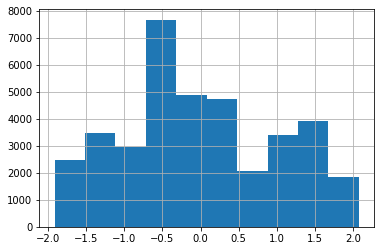

In [23]:
le = LabelEncoder()
s = StandardScaler()

le.fit(sandbox[['services_included']])
sandbox['services_included'] = le.transform(sandbox[['services_included']])

s.fit(sandbox[['services_included']])
sandbox['services_included'] = s.transform(sandbox[['services_included']])

sandbox['services_included'].hist()

In [ ]:
len(sandbox['postal_code'].unique())/len(sandbox['loc_name'].unique())

8.702205882352942

In [ ]:
len(sandbox['postal_code'].unique())/len(sandbox['city'].unique())

8.555421686746987

In [ ]:
px.scatter(sandbox, x='review_count', y='price_current', trendline='ols', width=900)

<AxesSubplot:>

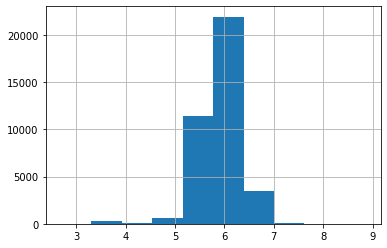

In [ ]:
sandbox['price_current'].hist()

In [ ]:
px.scatter(sandbox, x='overall_rating', y='review_count', trendline='ols', width=900)

<Axes: >

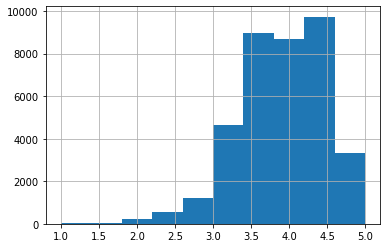

In [ ]:
sandbox['overall_rating'].hist()

<AxesSubplot:>

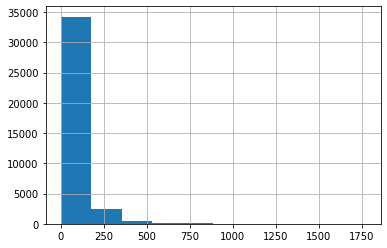

In [ ]:
sandbox['review_count'].hist()

In [ ]:
px.scatter(sandbox, x='overall_rating', y='price_current', trendline='ols', width=900)

In [ ]:
sandbox['currency'].unique()

array(['USD'], dtype=object)

<Axes: >

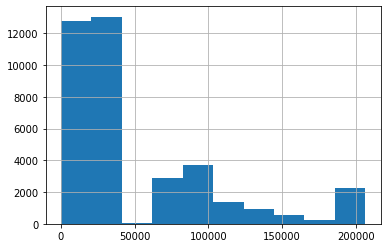

In [ ]:
sandbox['loc_number'].hist()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<Axes: >

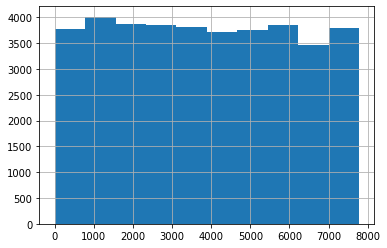

In [ ]:
le.fit(sandbox[['loc_number']])
sandbox['loc_number'] = le.transform(sandbox[['loc_number']])
sandbox['loc_number'].hist()

In [ ]:
px.scatter(sandbox, x='latitude', y='price_current', trendline='ols', width=900)

In [ ]:
px.scatter(sandbox, x='longitude', y='price_current', trendline='ols', width=900)

In [18]:
fig = px.scatter_mapbox(sandbox[sandbox['price_current'] < 5], lat="latitude", lon="longitude", 
                        hover_name='loc_name',
                        hover_data=["latitude","longitude"],
                        zoom=4, height=500, width=400,
                        color='product_name'
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

816


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<Axes: >

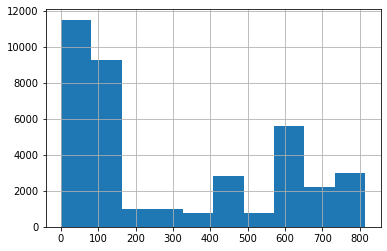

In [ ]:
print(len(sandbox['loc_name'].unique()))

le.fit(sandbox[['loc_name']])
sandbox['loc_name'] = le.transform(sandbox[['loc_name']])

sandbox['loc_name'].hist()

830


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<Axes: >

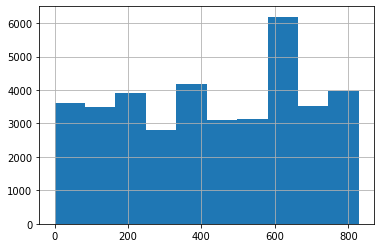

In [ ]:
print(len(sandbox['city'].unique()))

le.fit(sandbox[['city']])
sandbox['city'] = le.transform(sandbox[['city']])

sandbox['city'].hist()

In [ ]:
px.scatter(sandbox, x='loc_name', y='price_current', width=900)

In [ ]:
px.histogram(sandbox, x='price_current', color='product_name', barmode='stack', nbins=64, width=1000)

In [ ]:
px.box(sandbox, x='product_name', y='price_current', width=600)

In [ ]:
px.box(sandbox, x='payment_type', y='price_current', width=400, height=500)

In [21]:
le.fit(sandbox[['product_name']])
sandbox['product_name'] = le.transform(sandbox[['product_name']])

le.fit(sandbox[['payment_type']])
sandbox['payment_type'] = le.transform(sandbox[['payment_type']])

le.fit(sandbox[['city']])
sandbox['city'] = le.transform(sandbox[['city']])

le.fit(sandbox[['loc_name']])
sandbox['loc_name'] = le.transform(sandbox[['loc_name']])

sandbox = sandbox.dropna(how='any', axis=0)
sandbox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37375 entries, 0 to 53730
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   services_included  37375 non-null  float64
 1   loc_name           37375 non-null  int64  
 2   city               37375 non-null  int64  
 3   review_count       37375 non-null  float64
 4   latitude           37375 non-null  float64
 5   product_name       37375 non-null  int64  
 6   payment_type       37375 non-null  int64  
 7   price_current      37375 non-null  float64
 8   longitude          37375 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.9 MB


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_labe

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statistics import stdev, mean, median, variance

x_name = [name for name in sandbox.columns if name != 'price_current']
y_name = 'price_current'

X = sandbox[x_name]
y = sandbox[y_name]
sigma = stdev(y)
mu = mean(y)

X_t, X_v, y_t, y_v = train_test_split(X, y, test_size=0.5, random_state=42)

lr = LinearRegression()

lr.fit(X_t, y_t)

weights = lr.coef_
print('WEIGHTS---------------------')
for i, w in zip(x_name, weights):
    print(f'{i.ljust(20)} {w}')
print('')

y_hat = lr.predict(X_v)

mse = mean_squared_error(y_v, y_hat)

nstd = 1
performance = mse/((mu+(nstd*sigma))-(mu-(nstd*sigma)))

print('PERFORMANCE----------------')
print(f'{"MSE".ljust(20)} {mse}')
print(f'{"Variance".ljust(20)} {variance(y_hat)}')
print(f'{"Adjusted MSE".ljust(20)} {performance}')

WEIGHTS---------------------
services_included    -0.004342325539139291
loc_name             2.5146244262594288e-05
city                 9.094573777123095e-06
review_count         -0.0007604812783152523
latitude             -0.07437996554788386
product_name         -0.11080195213648122
payment_type         0.11359374235438147
longitude            -0.05446711496627259

PERFORMANCE----------------
MSE                  0.14230664025056589
Variance             0.03475002697818139
Adjusted MSE         0.1700626771425233
